We first import E2G class:

In [1]:
import pandas as pd
from encode_e2g import E2G

Choose ENCODE-E2G or ENCODE-E2G_Extended:

In [2]:
# True for ENCODE-E2G_Extended / False for  ENCODE-E2G
extented = True

Read the TSS file:

In [3]:
tss = pd.read_csv('./tss/RefSeqCurated.170308.bed.CollapsedGeneBounds.hg38.TSS500bp.bed', names = ['chr', 'start', 'end', 'gene', 'len', 'strand'], delimiter = '\t')
tss

chr     start       end          gene  len strand
0      chr1     11623     12123       DDX11L1    0      +
1      chr1     29120     29620        WASH7P    0      -
2      chr1     35831     36331       FAM138A    0      -
3      chr1     35831     36331       FAM138F    0      -
4      chr1     68840     69340         OR4F5    0      +
...     ...       ...       ...           ...  ...    ...
24456  chrY  22298626  22299126         TTTY5    0      -
24457  chrY  22308608  22309108       RBMY2FP    0      +
24458  chrY  22316427  22316927  LOC100652931    0      +
24459  chrY  23198842  23199342          DAZ1    0      -
24460  chrY  23219206  23219706          DAZ2    0      +

[24461 rows x 6 columns]

Read the CRISPRi E-G dataset:

In [4]:
if extented:
    dataset = pd.read_csv('./data/crispri/EPCrisprBenchmark_ensemble_data_GRCh38.K562_AllFeatures_NAfilled.FullModel.tsv', delimiter = '\t')
else:
    dataset = pd.read_csv('./data/crispri/EPCrisprBenchmark_ensemble_data_GRCh38.K562_ENCDO000AAD_ENCFF325RTP_DNaseOnly_features_NAfilled.tsv', delimiter = '\t')

dataset

Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.


dataset  chrom  chromStart   chromEnd  \
0      FlowFISH_K562   chr1     3774714    3775214   
1      FlowFISH_K562   chr1     3774714    3775214   
2      FlowFISH_K562   chr1     3774714    3775214   
3      FlowFISH_K562  chr10   125816658  125816735   
4      FlowFISH_K562  chr11     3261795    3262295   
...              ...    ...         ...        ...   
10407         TAPseq   chr8   125528738  125529164   
10408         TAPseq   chr8   125544507  125545059   
10409         TAPseq   chr8   125664274  125664878   
10410         TAPseq   chr8   125694248  125694539   
10411         TAPseq   chr8   125971910  125972281   

                                    name  EffectSize chrTSS     startTSS  \
0          CEP104|chr1:3691278-3691778:*   -0.293432   chr1    3857213.0   
1          LRRC47|chr1:3691278-3691778:*   -0.331178   chr1    3796503.0   
2           SMIM1|chr1:3691278-3691778:*   -0.472019   chr1    3772761.0   
3       UROS|chr10:127505227-127505304:*   -0.850000  chr10  125823284.0   
4           HBE1|chr11:3283025-3283525:*    0.029242  chr11    5505651.0   
...                                  ...         ...    ...          ...   
10407  NSMCE2|chr8:125528738-125529164:.    0.018247   chr8  125091679.0   
10408  NSMCE2|chr8:125544507-125545059:.    0.085396   chr8  125091679.0   
10409  NSMCE2|chr8:125664274-125664878:.   -0.021983   chr8  125091679.0   
10410  NSMCE2|chr8:125694248-125694539:.    0.020683   chr8  125091679.0   
10411  NSMCE2|chr8:125971910-125972281:.    0.048163   chr8  125091679.0   

            endTSS measuredGeneSymbol  ...  averageCorrWeighted  phastConMax  \
0        3857214.0             CEP104  ...             0.448160     0.992840   
1        3796504.0             LRRC47  ...             0.245901     0.992840   
2        3772762.0              SMIM1  ...             0.049335     0.992840   
3      125823285.0               UROS  ...             0.734418     0.541264   
4        5505652.0               HBE1  ...             0.425164     0.406397   
...            ...                ...  ...                  ...          ...   
10407  125091680.0             NSMCE2  ...             0.280975     0.631289   
10408  125091680.0             NSMCE2  ...             0.425164     0.406397   
10409  125091680.0             NSMCE2  ...             0.280975     0.219647   
10410  125091680.0             NSMCE2  ...             0.425164     0.406397   
10411  125091680.0             NSMCE2  ...             0.425164     0.406397   

       phyloPMax  P2PromoterClass ubiquitousExpressedGene  \
0       0.992840                1                       1   
1       0.992840                1                       1   
2       0.992840                0                       0   
3       1.587378                1                       1   
4       0.596624                0                       0   
...          ...              ...                     ...   
10407   1.126900                1                       1   
10408   0.596624                0                       0   
10409   1.086220                1                       1   
10410   0.596624                0                       0   
10411   0.596624                0                       0   

      HiCLoopOutsideNormalized HiCLoopCrossNormalized  inTAD  inCCD  \
0                          0.5               1.000000      0      0   
1                          0.5               0.500000      0      0   
2                          1.0               1.333333      0      0   
3                          1.0               2.000000      1      0   
4                          0.0               0.000000      0      0   
...                        ...                    ...    ...    ...   
10407                      0.5               7.500000      0      0   
10408                      0.0               0.000000      0      0   
10409                      0.5               9.000000      0      0   
10410                      0.0               0.

Read the feature table:

In [5]:
if extented:
    feature_table = pd.read_csv('./data/feature_table/model_ablation_encode_e2g_extended.tsv', delimiter = '\t')
else:
    feature_table = pd.read_csv('./data/feature_table/model_ablation_encode_e2g.tsv', delimiter = '\t')
    
feature_table

features           category  ENCODE-E2G_Extended  \
0                   EpiMapScore        correlation                    1   
1                glsCoefficient        correlation                    1   
2                 numTSSEnhGene            generic                    1   
3                 distanceToTSS            generic                    1   
4           normalizedDNase_enh  enhancer activity                    1   
5          normalizedDNase_prom  promoter activity                    1   
6         normalizedH3K27ac_enh  enhancer activity                    1   
7        normalizedH3K27ac_prom  promoter activity                    1   
8                  activity_enh  enhancer activity                    1   
9                     3DContact               Hi-C                    1   
10         activity_enh_squared  enhancer activity                    1   
11            3DContact_squared               Hi-C                    1   
12                activity_prom  promoter activity                    1   
13                 ABCNumerator                ABC                    1   
14                     ABCScore                ABC                    1   
15               ABCDenominator                ABC                    1   
16           numNearbyEnhancers            generic                    1   
17           sumNearbyEnhancers            generic                    1   
18         PEToutsideNormalized               CTCF                    1   
19           PETcrossNormalized               CTCF                    1   
20                     promCTCF               CTCF                    1   
21                      enhCTCF               CTCF                    1   
22            H3K4me3_e_max_L_8  enhancer activity                    1   
23       H3K4me3_e_grad_max_L_8          gradients                    1   
24       H3K27ac_e_grad_max_L_8          gradients                    1   
25         DNase_e_grad_max_L_8          gradients                    1   
26       H3K4me3_e_grad_min_L_8          gradients                    1   
27       H3K27ac_e_grad_min_L_8          gradients                    1   
28         DNase_e_grad_min_L_8          gradients                    1   
29            H3K4me3_p_max_L_8  promoter activity                    1   
30       H3K4me3_p_grad_max_L_8          gradients                    1   
31       H3K27ac_p_grad_max_L_8          gradients                    1   
32         DNase_p_grad_max_L_8          gradients                    1   
33       H3K4me3_p_grad_min_L_8          gradients                    1   
34       H3K27ac_p_grad_min_L_8          gradients                    1   
35         DNase_p_grad_min_L_8          gradients                    1   
36          averageCorrWeighted        correlation                    1   
37                  phastConMax       conservation                    1   
38                    phyloPMax       conservation                    1   
39              P2PromoterClass     promoter class                    1   
40      ubiquitousExpressedGene     promoter class                    1   
41     HiCLoopOutsideNormalized               Hi-C                    1   
42       HiCLoopCrossNormalized               Hi-C                    1   
43                        inTAD               Hi-C                    1   
44                        inCCD               CTCF                    1   
45  normalizedEP300_enhActivity  enhancer activity                    1   

    ENCODE-E2G_Extended without gradients  \
0                                       1   
1                                       1   
2                                       1   
3                                       1   
4                                       1   
5                                       1   
6                                       1   
7                                       1   
8                                       1   
9                                       1   
10

Import ENCODE-E2G class:

In [6]:
e2g = E2G(dataset, tss, feature_table, extended = extented)

Run dataset preprocesseing:

In [7]:
e2g.dataset_preprocessing()
e2g.df_dataset

dataset  chrom  chromStart   chromEnd  \
0      FlowFISH_K562   chr1     3774714    3775214   
1      FlowFISH_K562   chr1     3774714    3775214   
2      FlowFISH_K562   chr1     3774714    3775214   
3      FlowFISH_K562  chr10   125816658  125816735   
4      FlowFISH_K562  chr11     3261795    3262295   
...              ...    ...         ...        ...   
10370         TAPseq   chr8   125528738  125529164   
10371         TAPseq   chr8   125544507  125545059   
10372         TAPseq   chr8   125664274  125664878   
10373         TAPseq   chr8   125694248  125694539   
10374         TAPseq   chr8   125971910  125972281   

                                    name  EffectSize chrTSS     startTSS  \
0          CEP104|chr1:3691278-3691778:*   -0.293432   chr1    3857213.0   
1          LRRC47|chr1:3691278-3691778:*   -0.331178   chr1    3796503.0   
2           SMIM1|chr1:3691278-3691778:*   -0.472019   chr1    3772761.0   
3       UROS|chr10:127505227-127505304:*   -0.850000  chr10  125823284.0   
4           HBE1|chr11:3283025-3283525:*    0.029242  chr11    5505651.0   
...                                  ...         ...    ...          ...   
10370  NSMCE2|chr8:125528738-125529164:.    0.018247   chr8  125091679.0   
10371  NSMCE2|chr8:125544507-125545059:.    0.085396   chr8  125091679.0   
10372  NSMCE2|chr8:125664274-125664878:.   -0.021983   chr8  125091679.0   
10373  NSMCE2|chr8:125694248-125694539:.    0.020683   chr8  125091679.0   
10374  NSMCE2|chr8:125971910-125972281:.    0.048163   chr8  125091679.0   

            endTSS measuredGeneSymbol  ...  averageCorrWeighted  phastConMax  \
0        3857214.0             CEP104  ...             0.448160     0.992840   
1        3796504.0             LRRC47  ...             0.245901     0.992840   
2        3772762.0              SMIM1  ...             0.049335     0.992840   
3      125823285.0               UROS  ...             0.734418     0.541264   
4        5505652.0               HBE1  ...             0.425164     0.406397   
...            ...                ...  ...                  ...          ...   
10370  125091680.0             NSMCE2  ...             0.280975     0.631289   
10371  125091680.0             NSMCE2  ...             0.425164     0.406397   
10372  125091680.0             NSMCE2  ...             0.280975     0.219647   
10373  125091680.0             NSMCE2  ...             0.425164     0.406397   
10374  125091680.0             NSMCE2  ...             0.425164     0.406397   

       phyloPMax  P2PromoterClass ubiquitousExpressedGene  \
0       0.992840                1                       1   
1       0.992840                1                       1   
2       0.992840                0                       0   
3       1.587378                1                       1   
4       0.596624                0                       0   
...          ...              ...                     ...   
10370   1.126900                1                       1   
10371   0.596624                0                       0   
10372   1.086220                1                       1   
10373   0.596624                0                       0   
10374   0.596624                0                       0   

      HiCLoopOutsideNormalized  HiCLoopCrossNormalized  inTAD  inCCD  \
0                          0.5                1.000000      0      0   
1                          0.5                0.500000      0      0   
2                          1.0                1.333333      0      0   
3                          1.0                2.000000      1      0   
4                          0.0                0.000000      0      0   
...                        ...                     ...    ...    ...   
10370                      0.5                7.500000      0      0   
10371                      0.0                0.000000      0      0   
10372                      0.5                9.000000      0      0   
10373                      0.0       

Train the models and append the E-G prediction scores in heldout chromosomes to the dataset for all the models:

In [8]:
e2g.train_and_predict()
e2g.df_dataset

Number of models: 16
Model name: ENCODE-E2G_Extended | Number of features: 46
Number of E-G pairs in test chromosome chr1 is 826
Number of E-G pairs in test chromosome chr10 is 110
Number of E-G pairs in test chromosome chr11 is 1402
Number of E-G pairs in test chromosome chr12 is 595
Number of E-G pairs in test chromosome chr13 is 11
Number of E-G pairs in test chromosome chr14 is 139
Number of E-G pairs in test chromosome chr15 is 60
Number of E-G pairs in test chromosome chr16 is 172
Number of E-G pairs in test chromosome chr17 is 323
Number of E-G pairs in test chromosome chr18 is 69
Number of E-G pairs in test chromosome chr19 is 2260
Number of E-G pairs in test chromosome chr2 is 307
Number of E-G pairs in test chromosome chr20 is 119
Number of E-G pairs in test chromosome chr21 is 45
Number of E-G pairs in test chromosome chr22 is 99
Number of E-G pairs in test chromosome chr3 is 805
Number of E-G pairs in test chromosome chr4 is 109
Number of E-G pairs in test chromosome chr5 i

dataset  chrom  chromStart   chromEnd  \
0      FlowFISH_K562   chr1     3774714    3775214   
1      FlowFISH_K562   chr1     3774714    3775214   
2      FlowFISH_K562   chr1     3774714    3775214   
3      FlowFISH_K562  chr10   125816658  125816735   
4      FlowFISH_K562  chr11     3261795    3262295   
...              ...    ...         ...        ...   
10370         TAPseq   chr8   125528738  125529164   
10371         TAPseq   chr8   125544507  125545059   
10372         TAPseq   chr8   125664274  125664878   
10373         TAPseq   chr8   125694248  125694539   
10374         TAPseq   chr8   125971910  125972281   

                                    name  EffectSize chrTSS     startTSS  \
0          CEP104|chr1:3691278-3691778:*   -0.293432   chr1    3857213.0   
1          LRRC47|chr1:3691278-3691778:*   -0.331178   chr1    3796503.0   
2           SMIM1|chr1:3691278-3691778:*   -0.472019   chr1    3772761.0   
3       UROS|chr10:127505227-127505304:*   -0.850000  chr10  125823284.0   
4           HBE1|chr11:3283025-3283525:*    0.029242  chr11    5505651.0   
...                                  ...         ...    ...          ...   
10370  NSMCE2|chr8:125528738-125529164:.    0.018247   chr8  125091679.0   
10371  NSMCE2|chr8:125544507-125545059:.    0.085396   chr8  125091679.0   
10372  NSMCE2|chr8:125664274-125664878:.   -0.021983   chr8  125091679.0   
10373  NSMCE2|chr8:125694248-125694539:.    0.020683   chr8  125091679.0   
10374  NSMCE2|chr8:125971910-125972281:.    0.048163   chr8  125091679.0   

            endTSS measuredGeneSymbol  ...  \
0        3857214.0             CEP104  ...   
1        3796504.0             LRRC47  ...   
2        3772762.0              SMIM1  ...   
3      125823285.0               UROS  ...   
4        5505652.0               HBE1  ...   
...            ...                ...  ...   
10370  125091680.0             NSMCE2  ...   
10371  125091680.0             NSMCE2  ...   
10372  125091680.0             NSMCE2  ...   
10373  125091680.0             NSMCE2  ...   
10374  125091680.0             NSMCE2  ...   

       ENCODE-E2G_Extended without Hi-C.Score  \
0                                    0.088002   
1                                    0.364403   
2                                    0.978816   
3                                    0.825008   
4                                    0.006539   
...                                       ...   
10370                                0.000361   
10371                                0.015515   
10372                                0.001497   
10373                                0.012746   
10374                                0.009810   

       ENCODE-E2G_Extended without Hi-C and distance.Score  \
0                                               0.103250     
1                                               0.173695     
2                                               0.844116     
3                                               0.596326     
4                                               0.030408     
...                                                  ...     
10370                                           0.000527     
10371                                           0.029894     
10372                                           0.001818     
10373                                           0.029894     
10374                                           0.029894     

       ENCODE-E2G_Extended without contact.Score  \
0                                       0.071847   
1                                       0.401966   
2                                       0.984019   
3                                       0.722191   
4                                       0.003618   
...                                          ...   
10370                                   0.000489   
10371                                   0.010778   
10372                                   0.001940   
10373                                   0.00

Plot Precision-Recall curves:

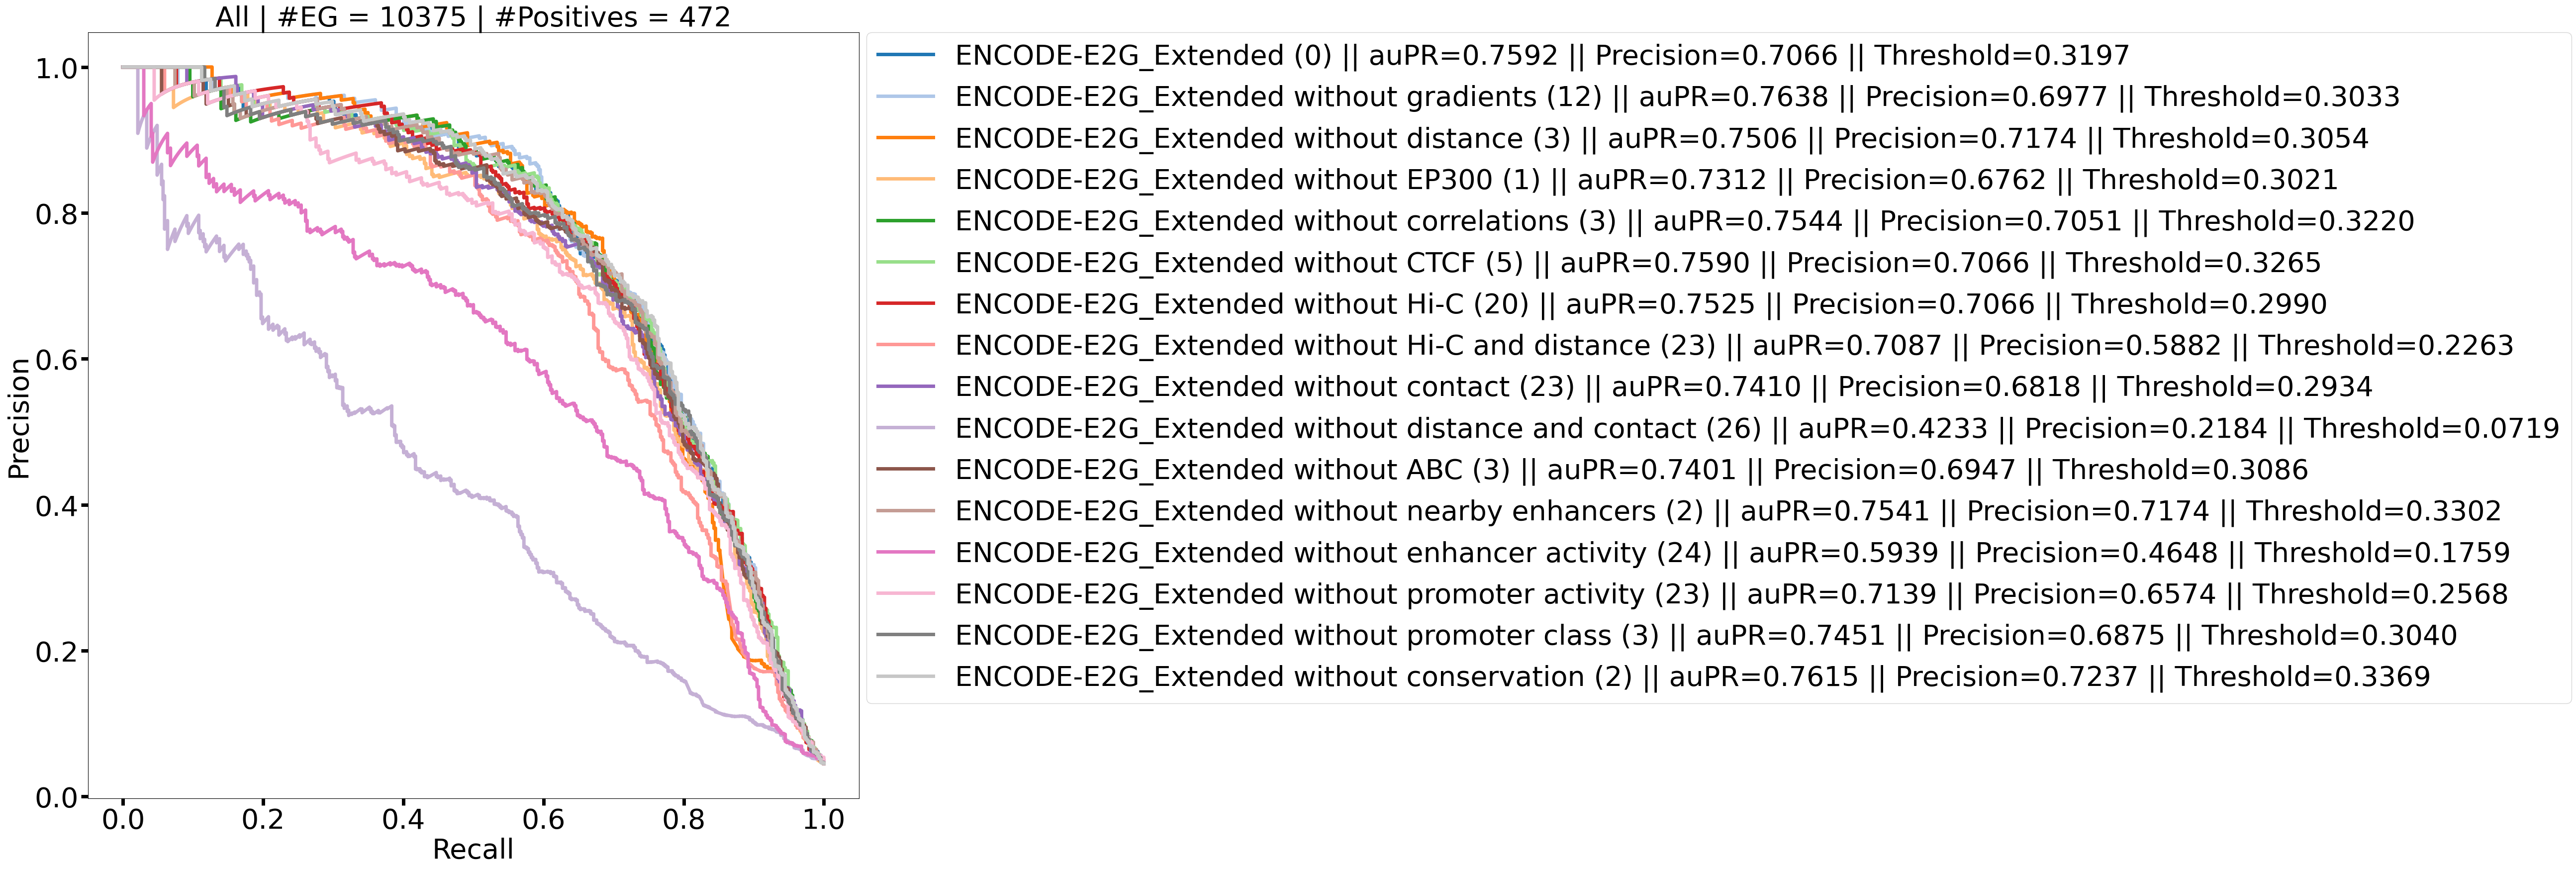

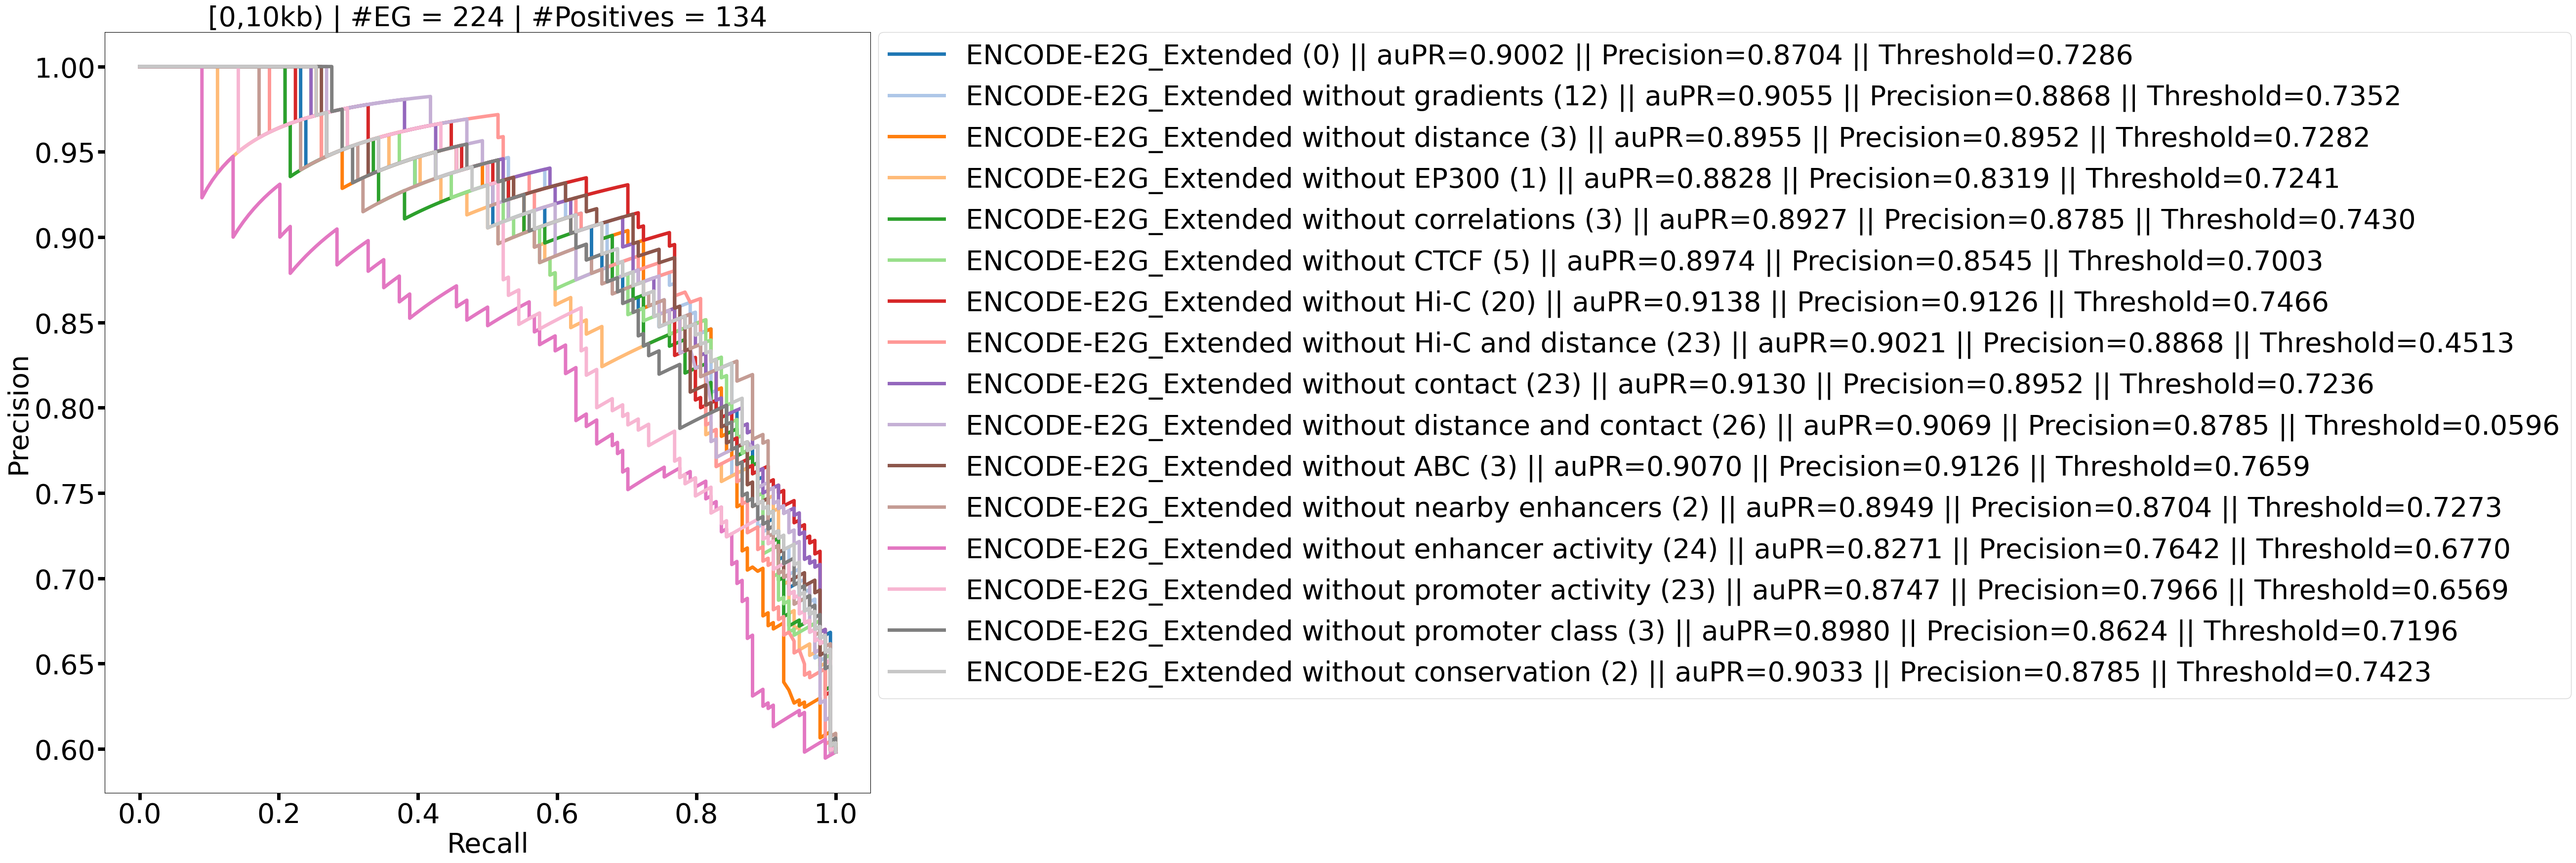

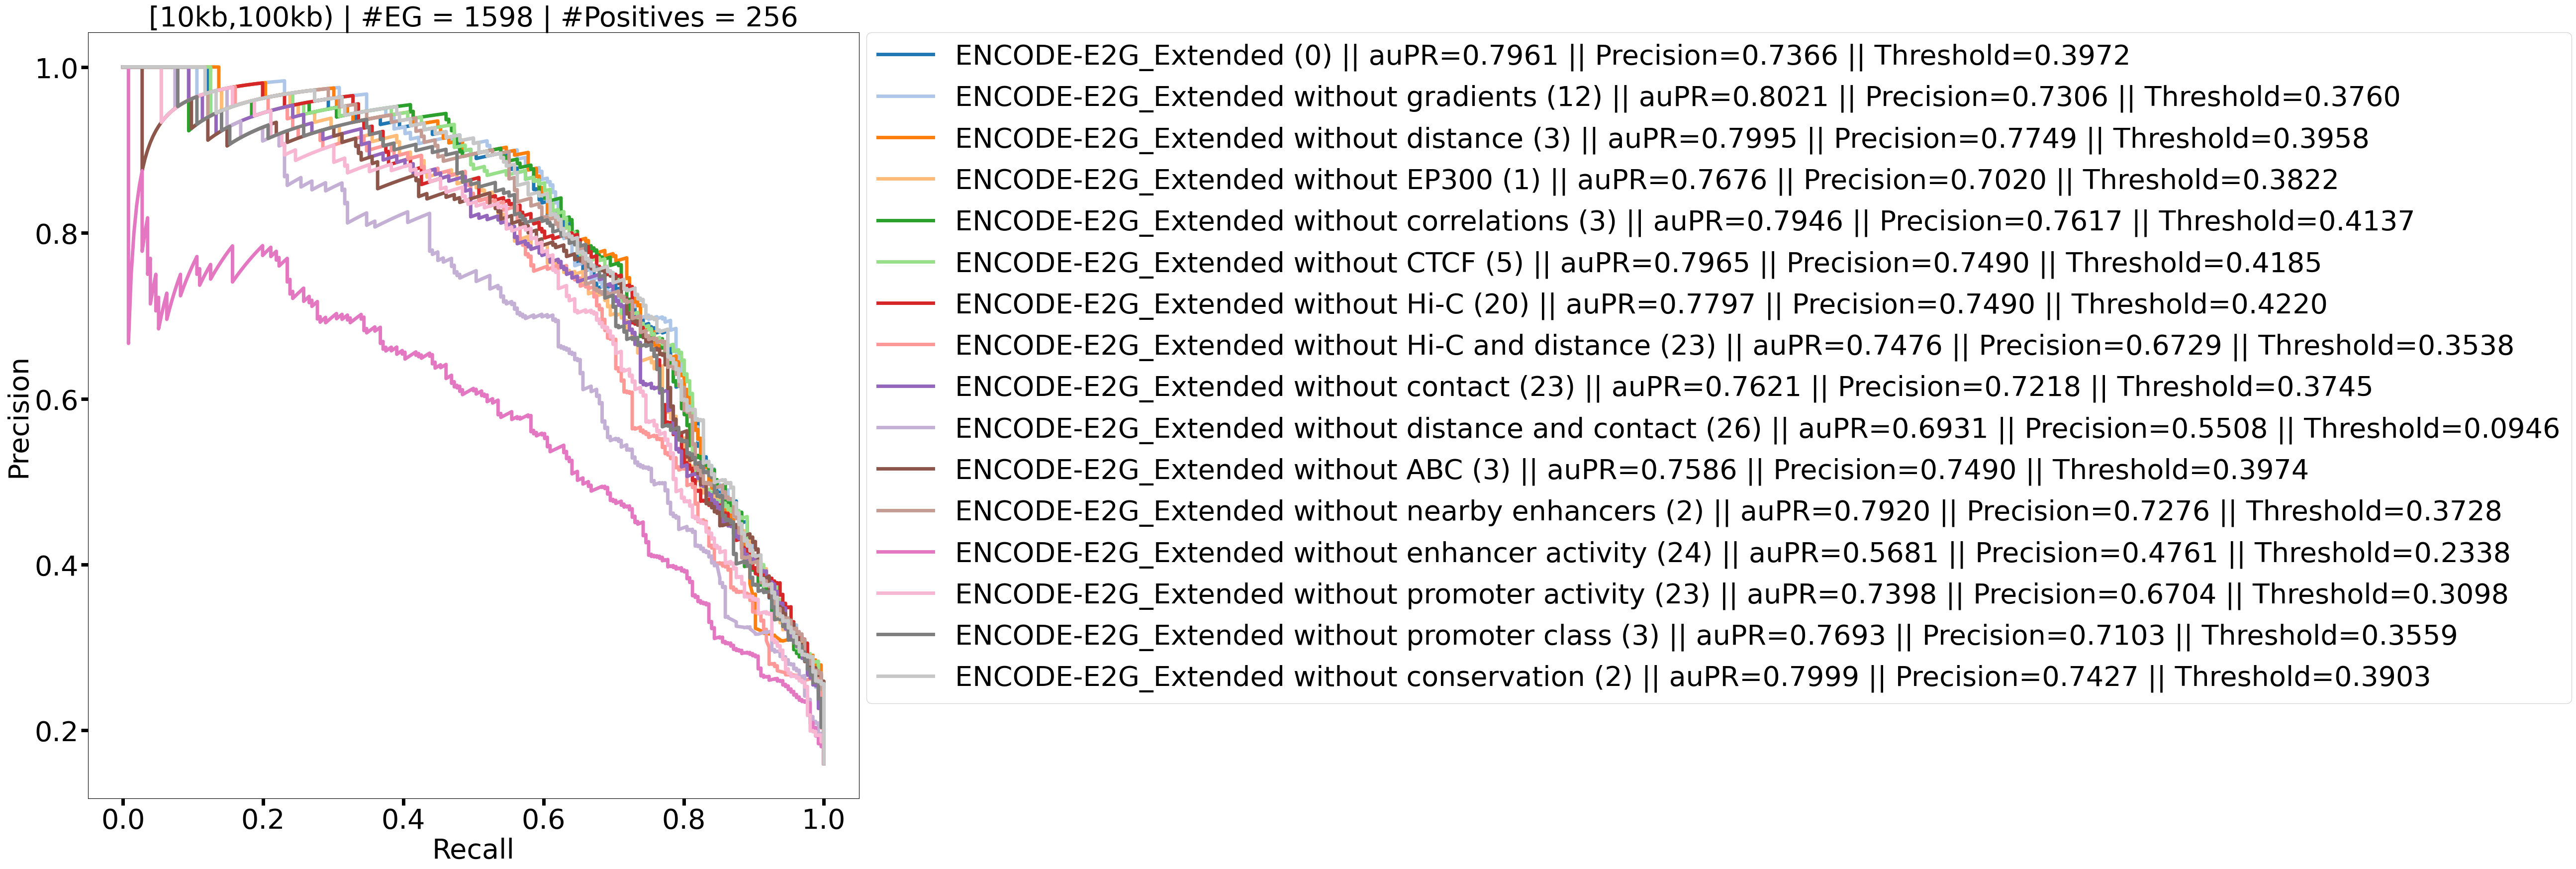

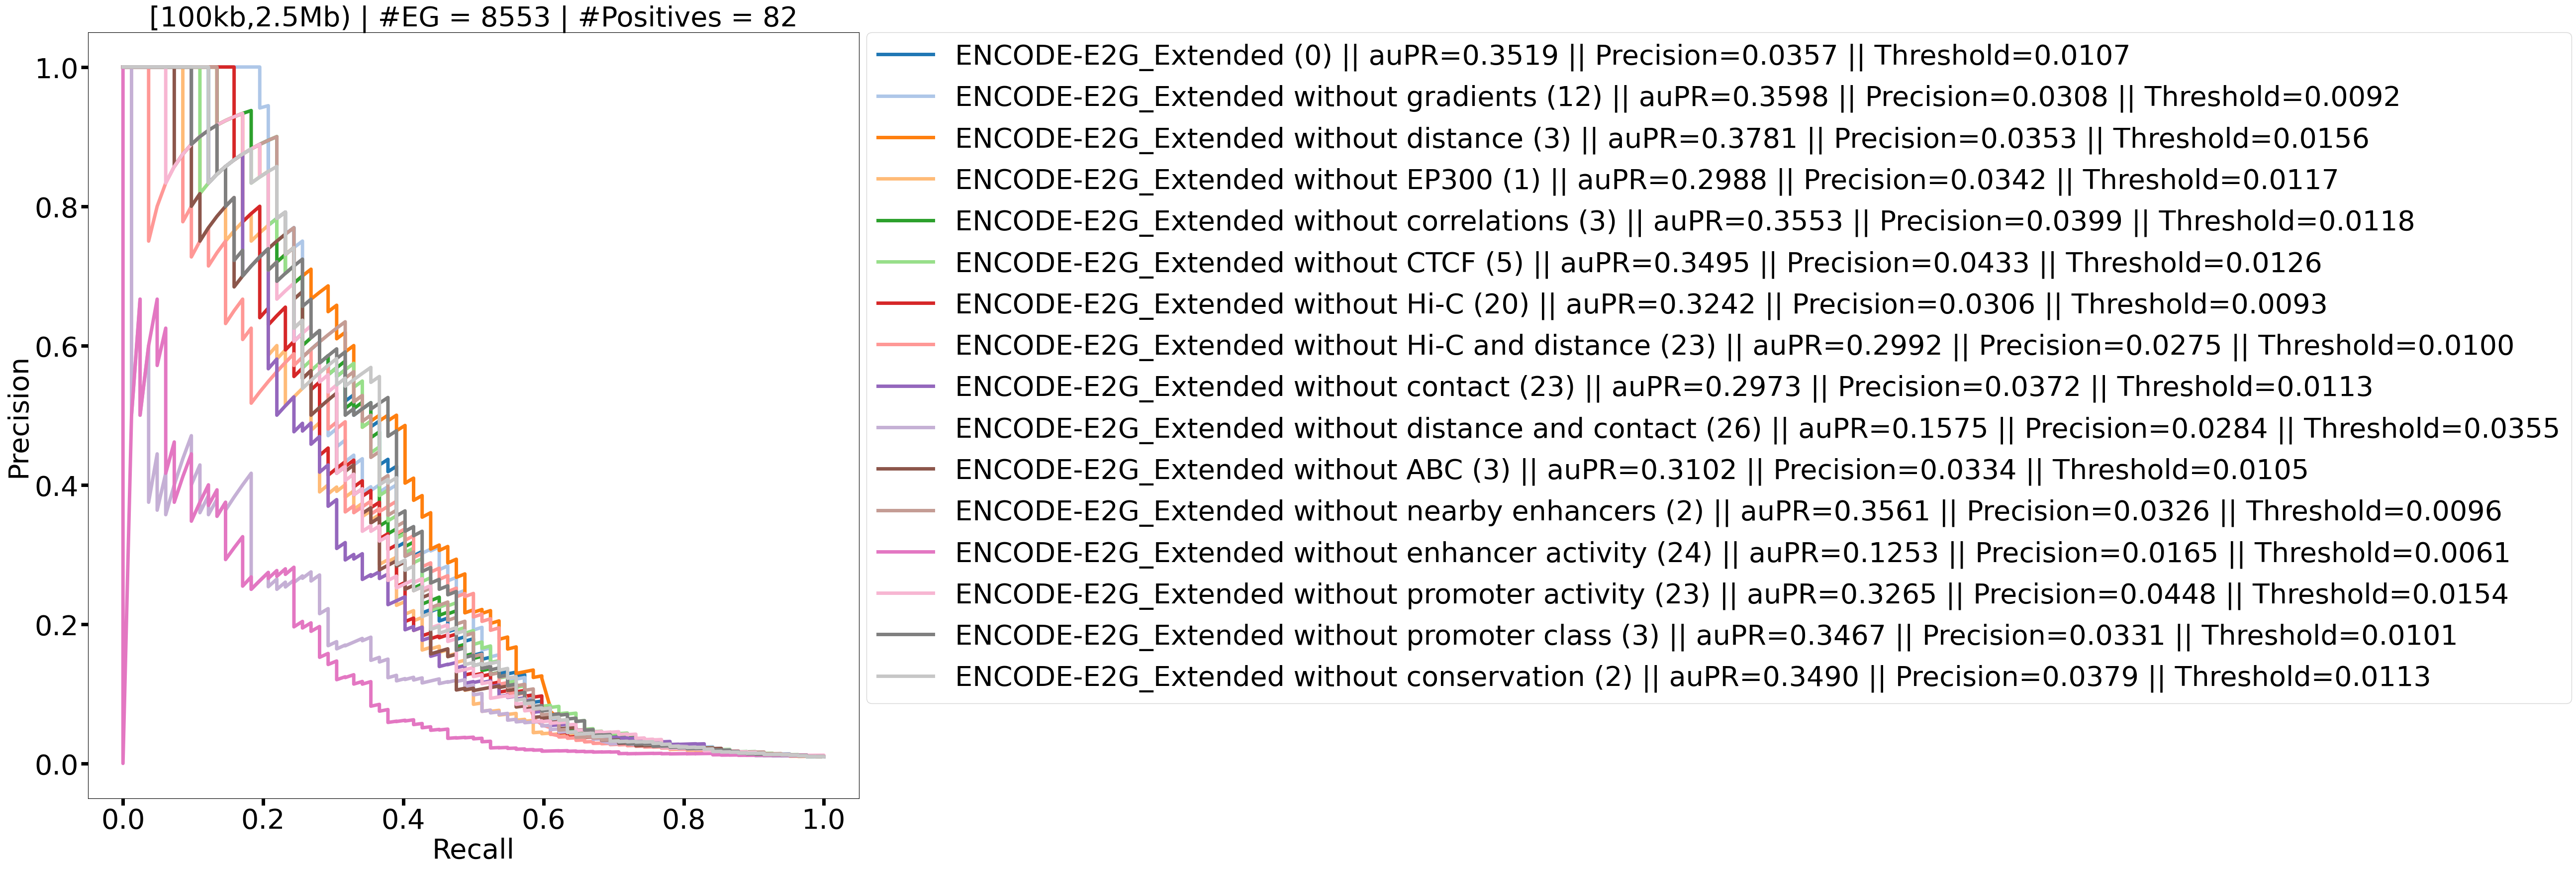

In [9]:
e2g.plot_PR_curves()

Plot 95% confidence interval of model ablations based on bootstrapping:

Distance range: All, model: ENCODE-E2G_Extended without gradients
Delta auPR p-value = 0.208
Delta precision p-value = 0.548
###################################################################################
Distance range: All, model: ENCODE-E2G_Extended without distance
Delta auPR p-value = 0.1
Delta precision p-value = 0.733
###################################################################################
Distance range: All, model: ENCODE-E2G_Extended without EP300
Delta auPR p-value = 0.0
Delta precision p-value = 0.195
###################################################################################
Distance range: All, model: ENCODE-E2G_Extended without correlations
Delta auPR p-value = 0.129
Delta precision p-value = 0.918
###################################################################################
Distance range: All, model: ENCODE-E2G_Extended without CTCF
Delta auPR p-value = 0.942
Delta precision p-value = 1.0
####################################################

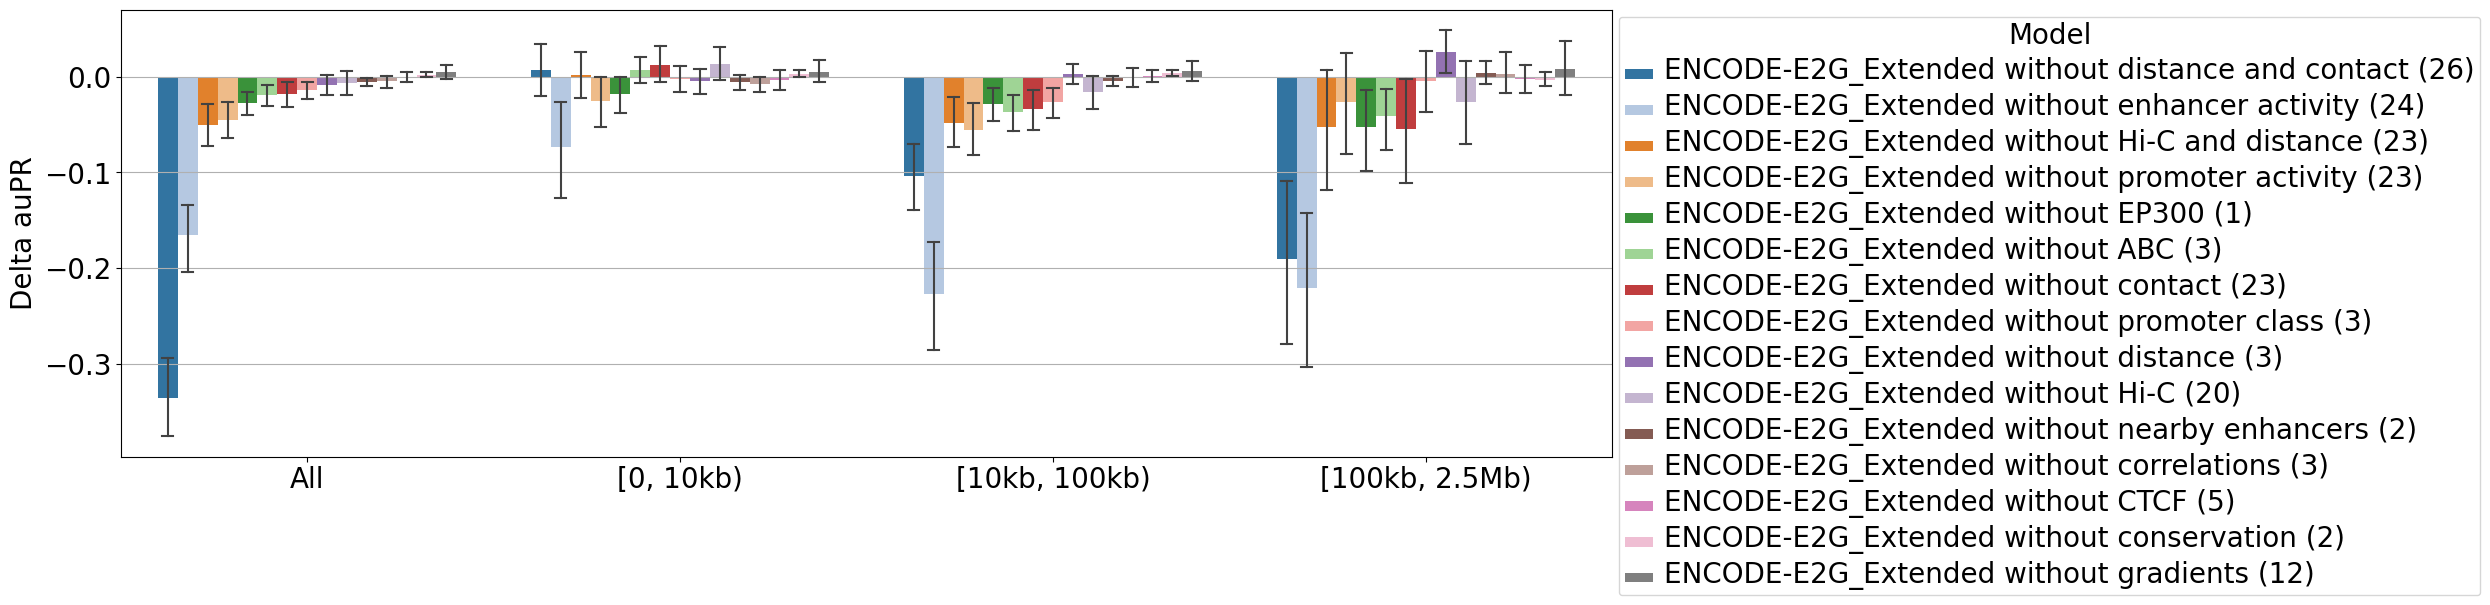

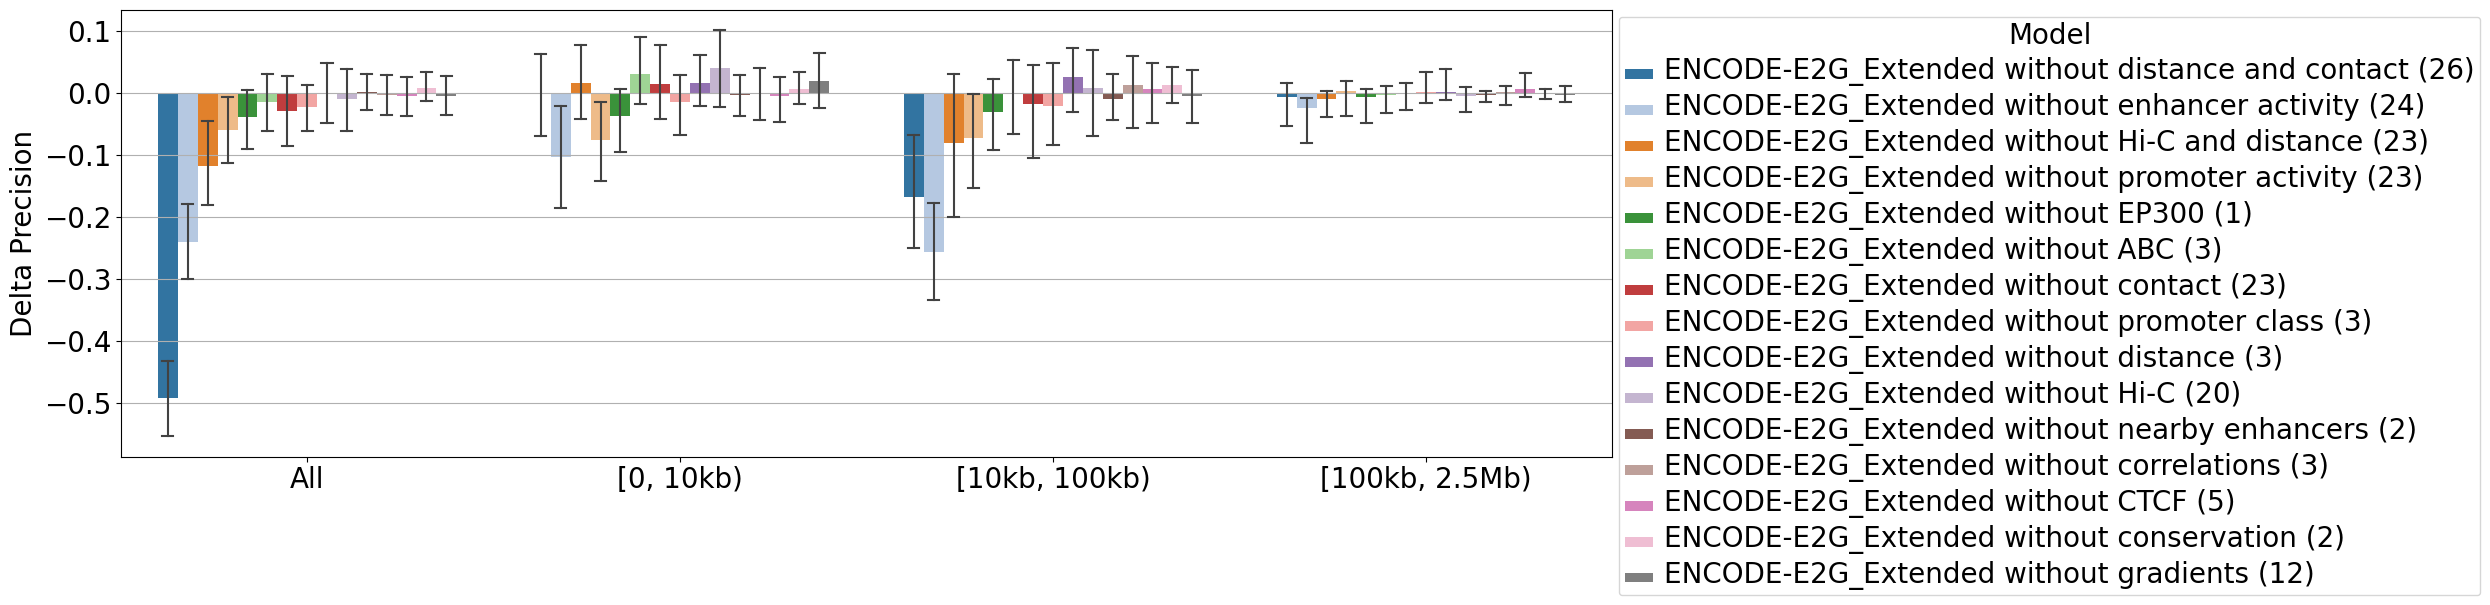

In [10]:
e2g.model_ablation_bootstrap()

Compute SHAP scores of the full models (ENCODE-E2G_Extended or ENCODE-E2G):

In [11]:
#e2g.compute_shap()

Genomewide E-G predictions:

In [12]:
#e2g.predict_genomewide()